# Procesamiento Digital de Audio
## Caleb Rascón
### Estimación de Múltiples Direcciones de Arribo
#### Multi GCC

In [15]:
#Bibliotecas
import numpy as np
from matplotlib import pyplot as plt
import reverb as rev #Biblioteca de utilería


### Setup

In [16]:
max_delay = 15  # desfase máximo en muestras

delay1 = 5     # Desfase de la señal 1 en el mic "y", respecto al mic "x"
delay2 = -10   # Desfase de la señal 2 en el mic "y", respecto al mic "x"

noise_w = 0.76    # Presencia de Ruido [0,1)
reverb_w = 0.1   # Presencia de reverberación [0,1)

K = 100        # Tamaño de la señal

# time vector
t = np.arange(K)

# original signals
s1 = np.exp(-np.pi*((t-6)**2)/10)
s2 = 0.75*np.exp(-np.pi*((t-20)**2)/K)

# microphones (input signals)
if delay1 >= 0:
    delay_x1 = 0

delay_x1 = np.abs(delay1) if delay1 < 0 else 0
delay_y1 = delay1 if delay1 >= 0 else 0

delay_x2 = np.abs(delay2) if delay2 < 0 else 0
delay_y2 = delay2 if delay2 >= 0 else 0

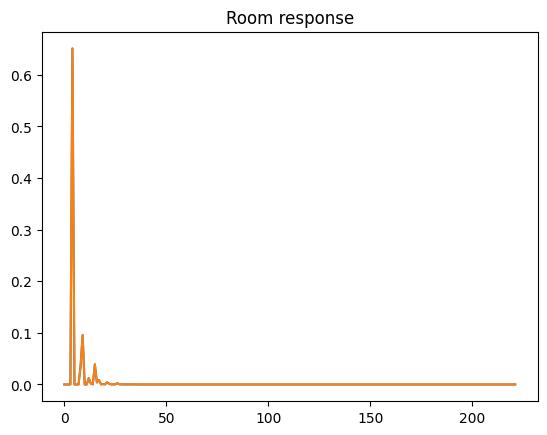

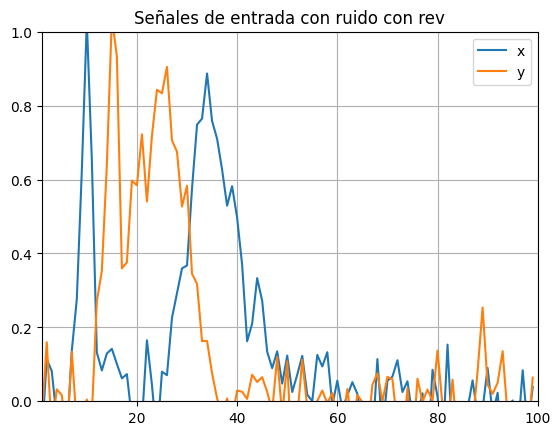

In [22]:
x = np.zeros(K)
x[delay_x1:] += s1[:K-delay_x1]  
x[delay_x2:] += s2[:K-delay_x2]

y = np.zeros(K)
y[delay_y1:] = s1[:K-delay_y1]  
y[delay_y2:] += s2[:K-delay_y2]

# adding reverb
x = rev.add_reverb(x, reverb_w)
y = rev.add_reverb(y, reverb_w)

# adding noise
x += np.random.randn(K) * noise_w / 10
y += np.random.randn(K) * noise_w / 10

plt.figure()
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.axis([1, K, 0, 1])
plt.legend()
plt.title(f"Señales de entrada{' con ruido'*(noise_w != 0)}{' con rev'*(reverb_w != 0)}")
plt.grid()
plt.show()

### GCC

In [18]:
#Centering
x_c = x - x.mean()
y_c = x - y.mean()

#FFT
x_f = np.fft.fft(x_c)
y_f = np.fft.fft(y_c)

Cross-Correlation via Pearson

In [19]:
#Cross-Correlation via Pearson
ccv_f = y_f * np.conj(x_f)
ccv = np.real( np.fft.ifft(ccv_f) ) / np.dot(np.linalg.norm(x_c), np.linalg.norm(y_c)) 

Cross-Correlation via GCC-PHAT

In [20]:
#Cross-Correlation via GCC-PHAT
ccv_fp = y_f * np.conj(x_f)/ np.abs(y_f * np.conj(x_f))
ccvp = np.real(np.fft.ifft(ccv_fp))


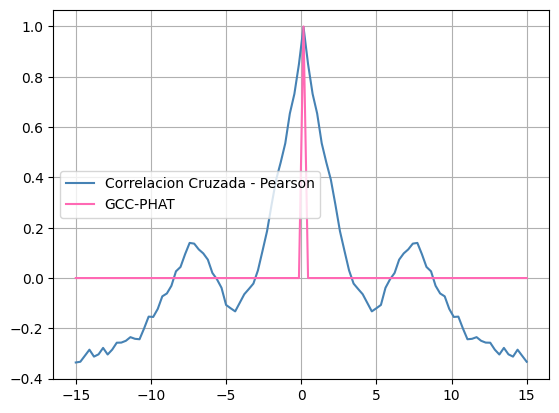

In [21]:
x = np.linspace(-max_delay, max_delay,100)

plt.plot(x,
         np.concatenate((ccv[ccv.shape[0]//2:],ccv[ :ccv.shape[0]//2])),
         color='steelblue', label='Correlacion Cruzada - Pearson'
)

plt.plot(x,
         np.concatenate((ccvp[ccvp.shape[0]//2:],ccvp[ :ccvp.shape[0]//2])),
         color='hotpink', label='GCC-PHAT'
)
plt.grid()
plt.legend(loc='center left')
plt.show()